<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/microsoft_Phi3_Vision_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Microsoft Phi3 Vision

phi-3-mini, a 3.8 billion parameter language model trained on 3.3 trillion tokens,
whose overall performance, as measured by both academic benchmarks and internal testing, rivals
that of models such as Mixtral 8x7B and GPT-3.5 (e.g., phi-3-mini achieves 69% on MMLU and 8.38
on MT-bench), despite being small enough to be deployed on a phone.
The innovation lies entirely in
our dataset for training, a scaled-up version of the one used for phi-2, composed of heavily filtered
publicly available web data and synthetic data. The model is also further aligned for robustness,
safety, and chat format. We also provide some initial parameter-scaling results with a 7B and 14B
models trained for 4.8T tokens, called phi-3-small and phi-3-medium, both significantly more
capable than phi-3-mini (e.g., respectively 75% and 78% on MMLU, and 8.7 and 8.9 on MT-bench).
Moreover, we also introduce phi-3-vision, a 4.2 billion parameter model based on phi-3-mini with
strong reasoning capabilities for image and text prompts


https://github.com/microsoft/Phi-3CookBook

https://huggingface.co/collections/microsoft/phi-3-6626e15e9585a200d2d761e3

https://onnxruntime.ai/docs/genai/tutorials/phi3-v.html

https://github.com/microsoft/onnxruntime-genai/blob/main/examples/python/phi-3-tutorial.md


In [ ]:

%pip install transformers -U --quiet
%pip install datasets -U --quiet
%pip install torch -U --quiet

%pip install -U flash-attn --no-build-isolation --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import warnings
import datetime
import pprint
# Disable a few less-than-useful UserWarnings from setuptools and pydantic
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=Warning)

In [ ]:
from PIL import Image
import requests
import torch
from transformers import AutoModelForCausalLM
from transformers import AutoProcessor

model_id = "microsoft/Phi-3-vision-128k-instruct"

kwargs = {}
kwargs['torch_dtype'] = torch.bfloat16

In [ ]:
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(model_id, trust_remote_code=True, torch_dtype="auto").cuda()



preprocessor_config.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

processing_phi3_v.py:   0%|          | 0.00/11.3k [00:00<?, ?B/s]

image_processing_phi3_v.py:   0%|          | 0.00/11.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- processing_phi3_v.py
- image_processing_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.85M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

configuration_phi3_v.py:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- configuration_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3_v.py:   0%|          | 0.00/75.4k [00:00<?, ?B/s]

image_embedding_phi3_v.py:   0%|          | 0.00/14.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- image_embedding_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-vision-128k-instruct:
- modeling_phi3_v.py
- image_embedding_phi3_v.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.35G [00:00<?, ?B/s]

You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with `model.to('cuda')`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

In [ ]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it\n
  try:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  except:
    image = image.convert('RGB')
  # show the image
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

In [ ]:
user_prompt = '<|user|>\n'
assistant_prompt = '<|assistant|>\n'
prompt_suffix = "<|end|>\n"

In [ ]:
prompt = f"{user_prompt}<|image_1|>\nCould you please introduce this stock to me and explain the plot?{prompt_suffix}{assistant_prompt}"


url = "https://g.foolcdn.com/editorial/images/767633/nvidiadatacenterrevenuefy2017tofy2024.png"

image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")


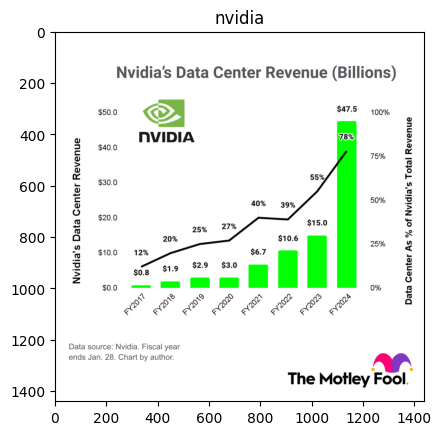

In [ ]:
plt_imshow("nvidia", image)

In [ ]:
time1 = datetime.datetime.now()
generate_ids = model.generate(**inputs,
                              max_new_tokens=1000,
                              eos_token_id=processor.tokenizer.eos_token_id,
                              )
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]

response = processor.batch_decode(generate_ids,
                                  skip_special_tokens=True,
                                  clean_up_tokenization_spaces=False)[0]


time2 = datetime.datetime.now()
print(f"Time taken: {time2 - time1}")

Time taken: 0:00:18.428768


In [ ]:
pprint.pprint(response)


("Certainly! The chart is a visual representation of Nvidia's Data Center "
 'Revenue over several fiscal years, from FY2017 to FY2024. The revenue is '
 'plotted on the left vertical axis in billions of dollars, while the right '
 "vertical axis shows the percentage of Nvidia's total revenue that the data "
 'center revenue represents. The horizontal axis at the bottom indicates the '
 'fiscal years in question.\n'
 '\n'
 "The chart features a line graph that shows a steady increase in Nvidia's "
 'Data Center Revenue from $0.8 billion in FY2017 to $47.5 billion in FY2024. '
 'This line graph is accompanied by a bar graph that illustrates the '
 'percentage of total revenue that the data center revenue accounts for each '
 'year. The percentage starts at 12% in FY2017 and grows to 78% by FY2024.\n'
 '\n'
 'The data source is credited to Nvidia, and the fiscal year ends on January '
 '28. The chart is created by The Motley Fool.')


In [ ]:
prompt = f"{user_prompt}<|image_1|>\nHelp me get the title and author information of this book?{prompt_suffix}{assistant_prompt}"

url = "https://marketplace.canva.com/EAFPHUaBrFc/1/0/1003w/canva-black-and-white-modern-alone-story-book-cover-QHBKwQnsgzs.jpg"

image = Image.open(requests.get(url, stream=True).raw)

time1 = datetime.datetime.now()
inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")

generate_ids = model.generate(**inputs,
                              max_new_tokens=1000,
                              eos_token_id=processor.tokenizer.eos_token_id,
                              )

generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]

response = processor.batch_decode(generate_ids,
                                  skip_special_tokens=False,
                                  clean_up_tokenization_spaces=False)[0]


time2 = datetime.datetime.now()
print(f"Time taken: {time2 - time1}")

Time taken: 0:00:02.043237


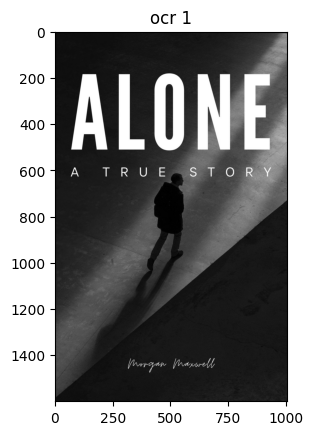

In [ ]:
plt_imshow("ocr 1", image)

In [ ]:
response

'The title of the book is "ALONE" and the author is Morgan Maxwell.<|end|><|endoftext|>'

In [ ]:
path = "/content/drive/MyDrive/data (1)/docs/image1.jpeg"


In [ ]:
image = Image.open(path).convert('RGB')

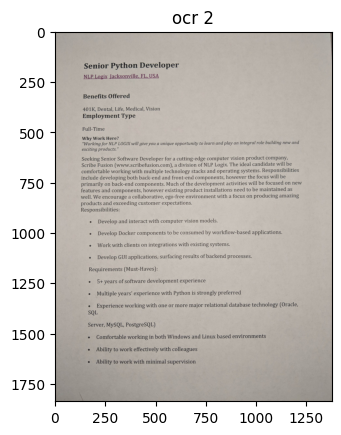

In [ ]:
plt_imshow("ocr 2", image)

In [ ]:
prompt = f"{user_prompt}<|image_1|>\Can you extract literally the text of the following image?{prompt_suffix}{assistant_prompt}"


time1 = datetime.datetime.now()
inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")

generate_ids = model.generate(**inputs,
                              max_new_tokens=1000,
                              eos_token_id=processor.tokenizer.eos_token_id,
                              )

generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]

response = processor.batch_decode(generate_ids,
                                  skip_special_tokens=False,
                                  clean_up_tokenization_spaces=False)[0]

time2 = datetime.datetime.now()
print(f"Time taken: {time2 - time1}")

Time taken: 0:00:26.603894


In [ ]:
pprint.pprint(response)

('Senior Python Developer\n'
 'NLP Logix Jacksonville, FL, USA\n'
 'Benefits Offered\n'
 '401K, Dental, Life, Medical, Vision\n'
 'Employment Type\n'
 'Full-Time\n'
 'Why Work Here?\n'
 '"Working for NLP LOGIX will give you a unique opportunity to learn and play '
 'an integral role building new and\n'
 'exciting products."\n'
 'Seeking Senior Software Developer for a cutting-edge computer vision product '
 'company,\n'
 'Scribe Fusion (www.scribefusion.com), a division of NLP Logix. The ideal '
 'candidate will be\n'
 'comfortable working with multiple technology stacks and operating systems. '
 'Responsibilities\n'
 'include developing both back-end and front-end components, however the focus '
 'will be\n'
 'primarily on back-end components. Much of the development activities will be '
 'focused on new\n'
 'features and components, however existing product installations need to be '
 'maintained as\n'
 'well. We encourage a collaborative, ego-free environment with a focus on '
 'pro

In [ ]:
prompt = f"{user_prompt}<|image_1|>\n<|image_2|>\n What is difference in this two images?{prompt_suffix}{assistant_prompt}"

print(f">>> Prompt\n{prompt}")

url = "https://hinhnen.ibongda.net/upload/wallpaper/doi-bong/2012/11/22/arsenal-wallpaper-free.jpg"

image_1 = Image.open(requests.get(url, stream=True).raw)

url = "https://assets-webp.khelnow.com/d7293de2fa93b29528da214253f1d8d0/news/uploads/2021/07/Arsenal-1024x576.jpg.webp"

image_2 = Image.open(requests.get(url, stream=True).raw)

images = [image_1, image_2]

time1 = datetime.datetime.now()
inputs = processor(prompt, images, return_tensors="pt").to("cuda:0")

generate_ids = model.generate(**inputs,
                              max_new_tokens=1000,
                              eos_token_id=processor.tokenizer.eos_token_id,
                              )

generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]

response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

time2 = datetime.datetime.now()
print(f"Time taken: {time2 - time1}")

>>> Prompt
<|user|>
<|image_1|>
<|image_2|>
 What is difference in this two images?<|end|>
<|assistant|>

Time taken: 0:00:10.132977


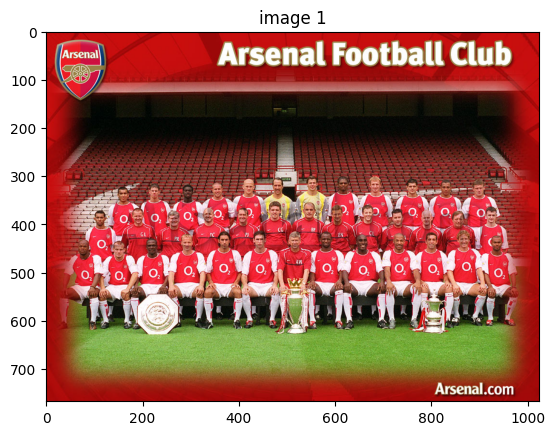

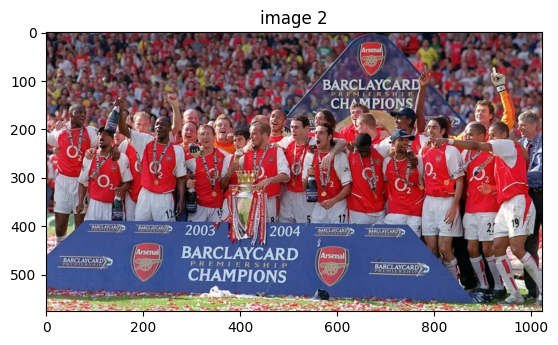

(None, None)

In [ ]:
plt_imshow("image 1", image_1), plt_imshow("image 2", image_2)

In [ ]:
pprint.pprint(response)

('The first image shows a group of soccer players from the Arsenal Football '
 'Club posing for a team photo with their trophies, while the second image '
 'shows a group of soccer players from the Arsenal Football Club celebrating a '
 'victory with a large crowd of fans in the background. The difference between '
 'the two images is that the first image captures a moment of the team posing '
 'with their trophies, while the second image captures a moment of the team '
 'celebrating a victory with the fans.')
